In [35]:
!pip install gensim

In [36]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [37]:
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The fox is quick and the dog is lazy",
    "I love learning about natural language processing",
    "Word embeddings capture semantic meaning of words",
    "The dog chased the fox yesterday",
    "Gensim makes training word embeddings easy"
]

In [38]:
tokenized_corpus = [simple_preprocess(doc) for doc in corpus]

print("Tokenized Corpus:")
for i, tokens in enumerate(tokenized_corpus):
    print(f"Sentence {i+1}: {tokens}")
print("\n")

Tokenized Corpus:
Sentence 1: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Sentence 2: ['the', 'fox', 'is', 'quick', 'and', 'the', 'dog', 'is', 'lazy']
Sentence 3: ['love', 'learning', 'about', 'natural', 'language', 'processing']
Sentence 4: ['word', 'embeddings', 'capture', 'semantic', 'meaning', 'of', 'words']
Sentence 5: ['the', 'dog', 'chased', 'the', 'fox', 'yesterday']
Sentence 6: ['gensim', 'makes', 'training', 'word', 'embeddings', 'easy']




In [39]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

print("Word2Vec model trained successfully.\n")

Word2Vec model trained successfully.



In [40]:
print("Vocabulary Words:")
print(model.wv.index_to_key)

Vocabulary Words:
['the', 'dog', 'fox', 'embeddings', 'word', 'is', 'lazy', 'quick', 'easy', 'training', 'makes', 'gensim', 'yesterday', 'chased', 'words', 'of', 'meaning', 'semantic', 'capture', 'processing', 'language', 'natural', 'about', 'learning', 'love', 'and', 'over', 'jumps', 'brown']


In [41]:
word = "fox"
print(f"\nEmbedding vector for '{word}':")
print(model.wv[word])
print(f"\nVector length: {len(model.wv[word])}")


Embedding vector for 'fox':
[-0.0172554   0.00733253  0.01037627  0.01148686  0.01493383 -0.01233895
  0.0022089   0.01208996 -0.00568847 -0.01233852 -0.00082249 -0.01672755
 -0.01119168  0.01420843  0.00671741  0.01444387  0.01359485  0.01506148
 -0.00758475 -0.00111802  0.00469404 -0.00904344  0.0167834  -0.01971552
  0.01353031  0.00582543 -0.00985707  0.00879714 -0.00348411  0.01342388
  0.01993769 -0.00872612 -0.00119478 -0.01137895  0.00770526  0.00558903
  0.01378544  0.01219015  0.0190651   0.01854789  0.01578977 -0.01397422
 -0.01831102 -0.00071549 -0.00619826  0.01578631  0.01187926 -0.00309468
  0.00301905  0.0035796 ]

Vector length: 50


In [42]:
print(f"\nMost similar words to '{word}':")
print(model.wv.most_similar(word))


Most similar words to 'fox':
[('capture', 0.19607822597026825), ('word', 0.16586196422576904), ('gensim', 0.15511246025562286), ('of', 0.14377765357494354), ('learning', 0.14370639622211456), ('over', 0.1433434635400772), ('easy', 0.13942065834999084), ('the', 0.1266775280237198), ('brown', 0.12477710098028183), ('makes', 0.12149199098348618)]


In [43]:
from sklearn.cluster import KMeans
import numpy as np

vectors = np.array([model.wv[word] for word in model.wv.index_to_key])
words = model.wv.index_to_key

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(vectors)
labels = kmeans.labels_

for word, label in zip(words, labels):
    print(label, word)

1 the
2 dog
1 fox
1 embeddings
2 word
2 is
2 lazy
1 quick
0 easy
2 training
0 makes
1 gensim
2 yesterday
1 chased
2 words
0 of
2 meaning
0 semantic
1 capture
2 processing
0 language
1 natural
1 about
1 learning
1 love
2 and
1 over
1 jumps
2 brown


<Axes: >

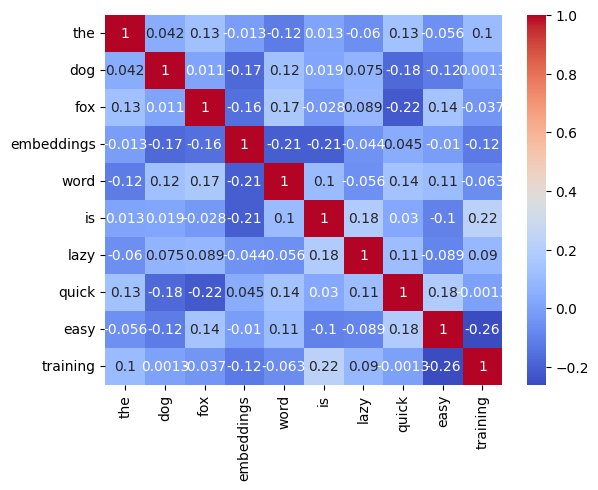

In [44]:
import seaborn as sns
import numpy as np

words = model.wv.index_to_key[:10]  # first 10 words
matrix = np.zeros((10,10))

for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        matrix[i,j] = model.wv.similarity(w1, w2)

sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap="coolwarm")